# Section 3.1.3: Subspace methods: the G-MUSIC algorithm

This page contains simulations in Section 3.1.3: estimation of the "direction of arrival" of signal from noisy observation

## Contents

    - Basic settings
    - MUSIC versus G-MUSIC

## Basic settings

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
pi = np.pi

In [74]:
p = 30
n = 150
c = p/n

theta_true = np.array([-10, 35, 37])/180*pi
k = len(theta_true)
sigma2 = .1
P = np.eye(k)
a = lambda theta : np.exp(-pi*1j*np.mat(range(p)).T@np.mat(np.sin(theta)))/np.sqrt(p)
A = a(theta_true)

theta_range = np.linspace(-45,45,500)/180*pi

np.random.seed(991)

S = scipy.linalg.sqrtm(P) @ np.random.randn(k,n)
W = (np.random.randn(p,n) + 1j*np.random.randn(p,n))/np.sqrt(2)
X = A@S + np.sqrt(sigma2/2)*W
SCM = X@X.H/n
eigs_SCM,U = np.linalg.eigh(SCM)
index = np.argsort(eigs_SCM)[::-1]
eigs_SCM = eigs_SCM[index]
U = U[:, index]
U_S = U[:,range(k)]

## MUSIC versus G-MUSIC

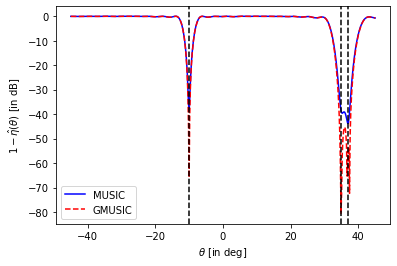

In [84]:
store_output = [] # np.zeros( (len(theta_range),2) ) # [MUSIC, G-MUSIC]

for theta in theta_range:

    #G-MUSIC with different estimators for sigma2
    sigma2_estim = eigs_SCM[k]/(1+np.sqrt(c))**2
    #sigma2_estim = sigma2;
    tmp = 0
    D = np.zeros( (k,k) )
    for l in range(k):
        lambda_ = eigs_SCM[l]/sigma2_estim
        if lambda_>(1+np.sqrt(c))**2:
            ell_estim = (lambda_-(1+c))/2 + np.sqrt( (lambda_-(1+c))**2 - 4*c)/2
            D[l,l] = (ell_estim**2+c*ell_estim)/(ell_estim**2-c)

    # MUSIC vs G-MUSIC
    store_output.append( ( (20*np.log10(np.abs(1 - a(theta).H@U_S@(U_S.H)@a(theta)))).item(0) , (20*np.log10(np.abs((1 - (a(theta).H@U_S@D@(U_S.H)@a(theta)) )))).item(0)) )
    
plt.plot(theta_range*180/pi,np.array(store_output)[:,0],'b',label='MUSIC')
plt.plot(theta_range*180/pi,np.array(store_output)[:,1],'r--',label='GMUSIC')
plt.axvline(x=-10,c='k',ls='--')
plt.axvline(x=35,c='k',ls='--')
plt.axvline(x=37,c='k',ls='--')
plt.xlabel(r'$\theta$ [in deg]')
plt.ylabel(r'$1-\hat \eta(\theta)$ [in dB]')
_ = plt.legend()